## Problem Statement

### Business Context

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at $121.61 billion in 2019 and is projected to reach $1,039.03 billion by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent ba


### Objective

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership


### Data Description

The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

Data Dictiona
ry:
visitors: Average number of visitors, in millions, to the platform in the past 
week
ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and compl
eted)
major_sports_event: Any major sports event on t
he day
genre: Genre of the 
content
dayofweek: Day of the release of the
 content
season: Season of the release of th
e content
views_trailer: Number of views, in millions, of the conte
nt trailer
views_content: Number of first-day views, in millions, of 
the content.sis.

## Importing necessary libraries

In [4]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()



# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [6]:
data = pd.read_csv('ottdata.csv')

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [9]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


### Checking the shape of the dataset

In [11]:
data.shape

(1000, 8)

### Checking the data types of the columns for the dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


### Statistical summary of the dataset

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
major_sports_event,1000.0,0.40000,0.490143,0.00,0.0000,0.00,1.000,1.00
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89


### Checking for duplicate values

In [17]:
data.duplicated().sum()

0

### Checking for missing values

In [19]:
data.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

In [20]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis

### Univariate Analysis

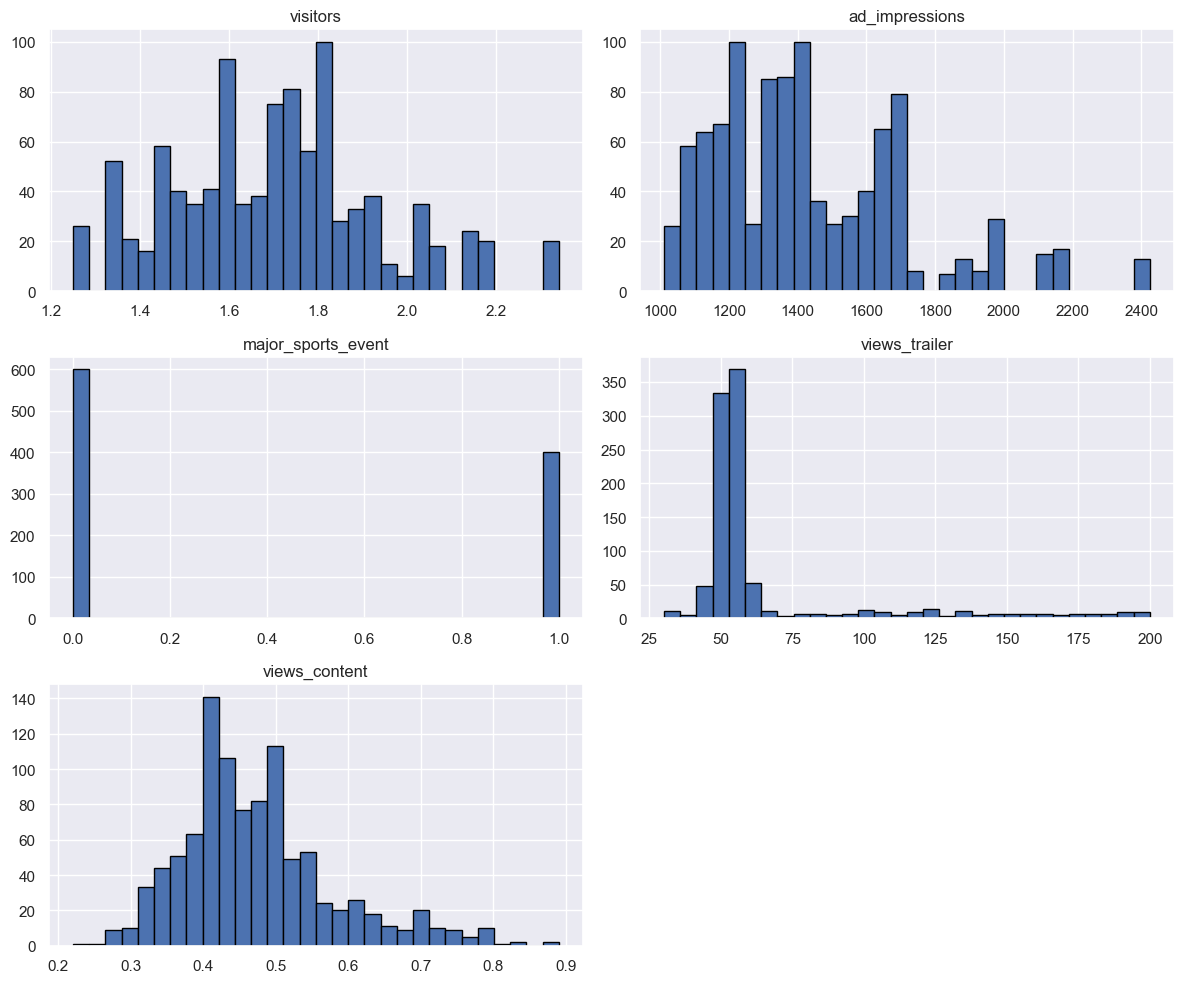

In [23]:
data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [24]:
# What does the distribution of content views look like?

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

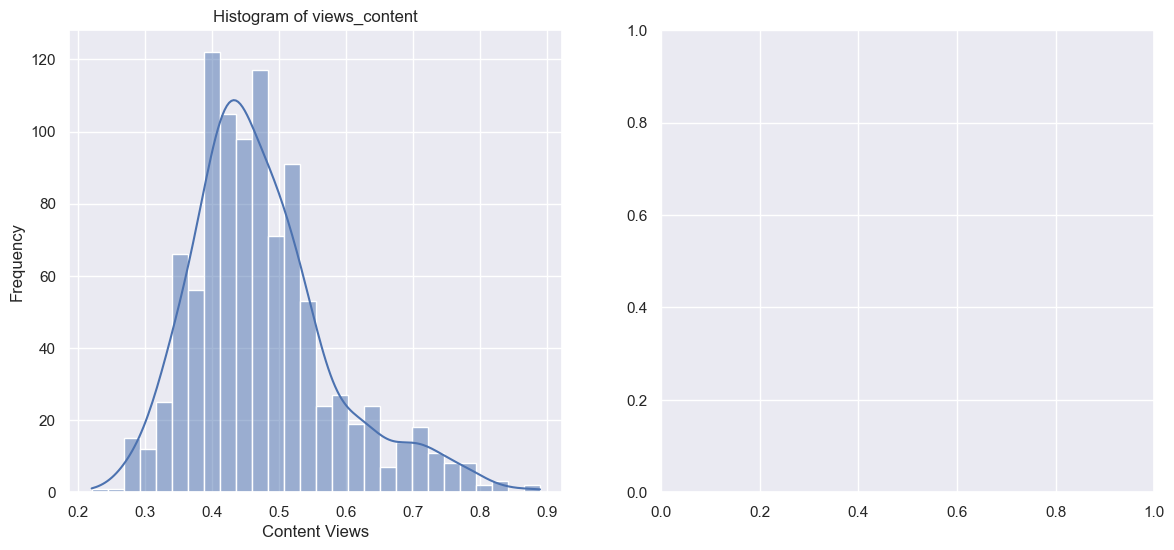

In [25]:
content_views_column = 'views_content'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.histplot(data[content_views_column], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram of {content_views_column}')
axes[0].set_xlabel('Content Views')
axes[0].set_ylabel('Frequency')

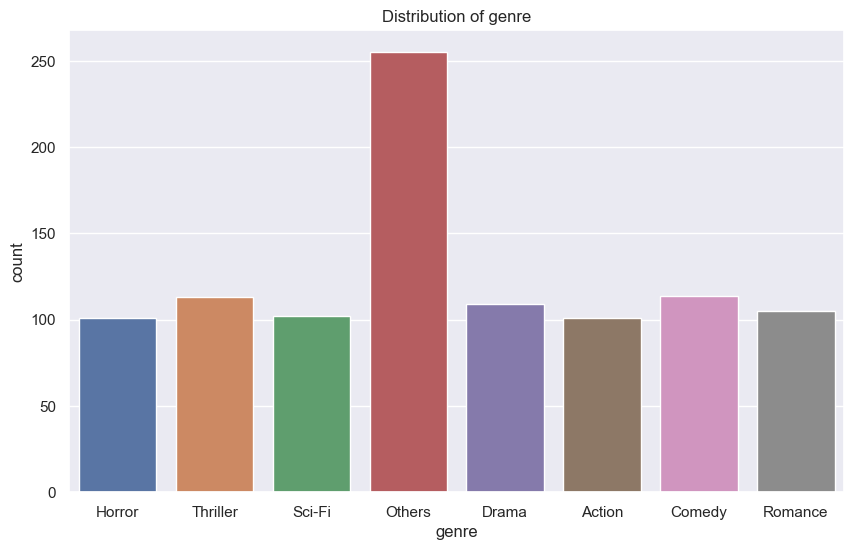

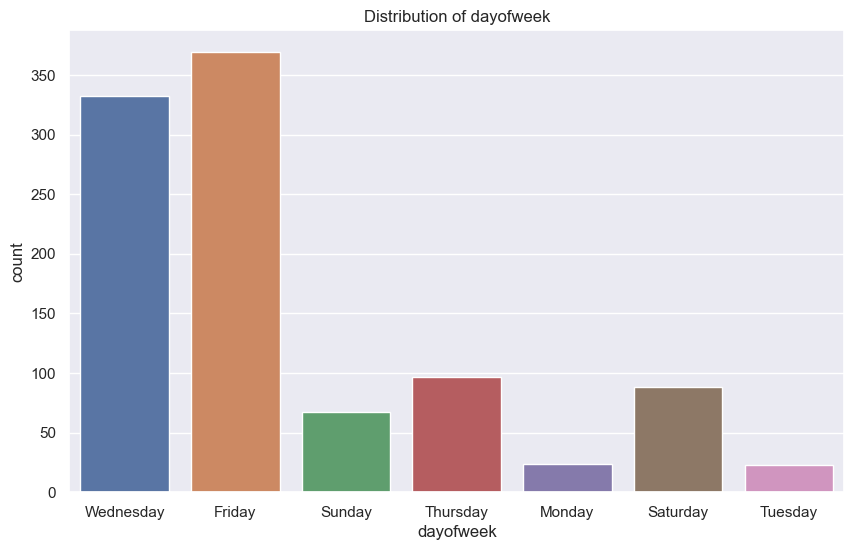

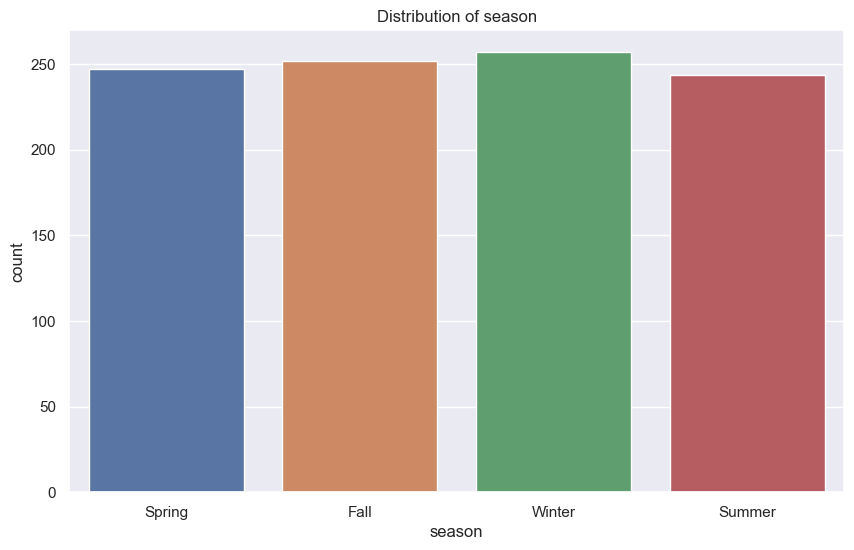

In [26]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [27]:
# What does the distribution of genres look like?

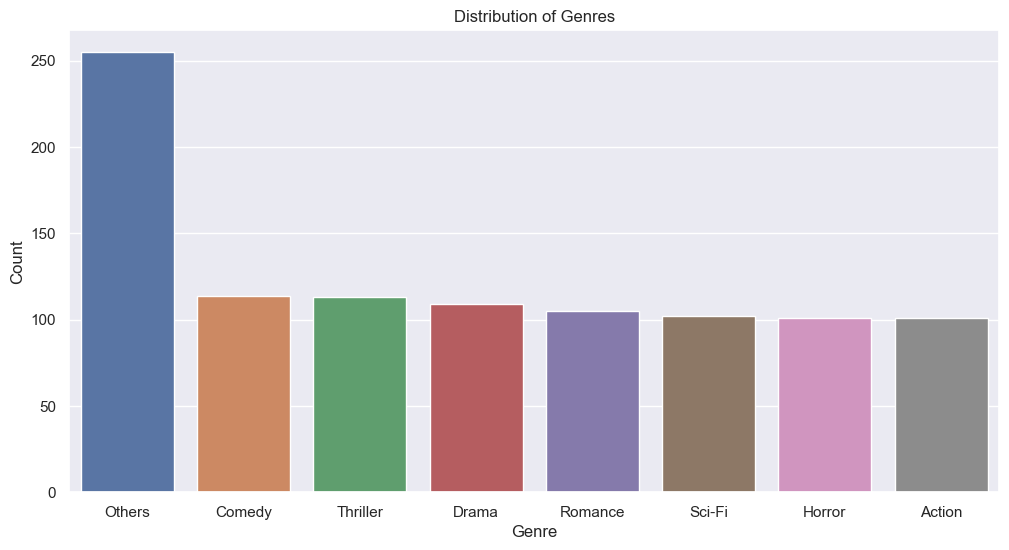

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='genre', order=data['genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [29]:
# How does the viewership vary with the day of release?

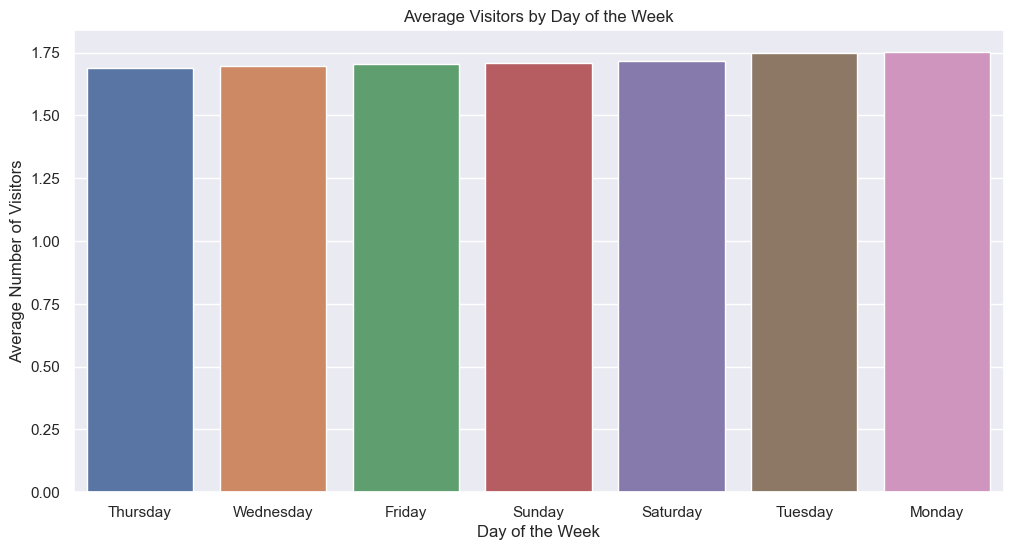

In [30]:
dayofweek_visitors = data.groupby('dayofweek')['visitors'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=dayofweek_visitors.index, y=dayofweek_visitors.values)
plt.title('Average Visitors by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Visitors')
plt.show()

In [31]:
# How does the viewership vary with the season of release?

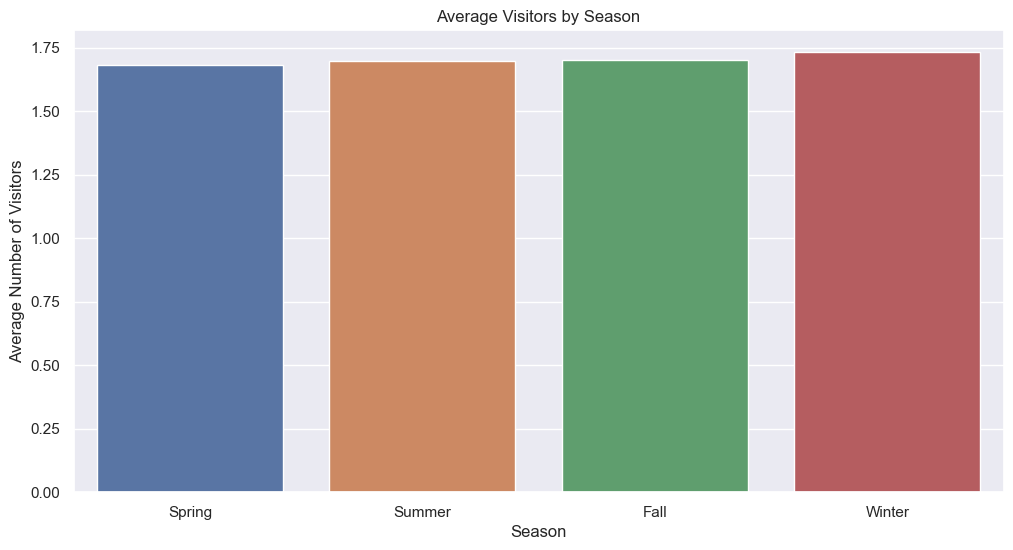

In [32]:
season_visitors = data.groupby('season')['visitors'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=season_visitors.index, y=season_visitors.values)
plt.title('Average Visitors by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Visitors')
plt.show()

In [33]:
# What is the correlation between trailer views and content views?

In [203]:
correlation = df['views_trailer'].corr(df['views_content'])

print("Correlation between trailer views and content views:", correlation)

Correlation between trailer views and content views: 0.7539622148205366


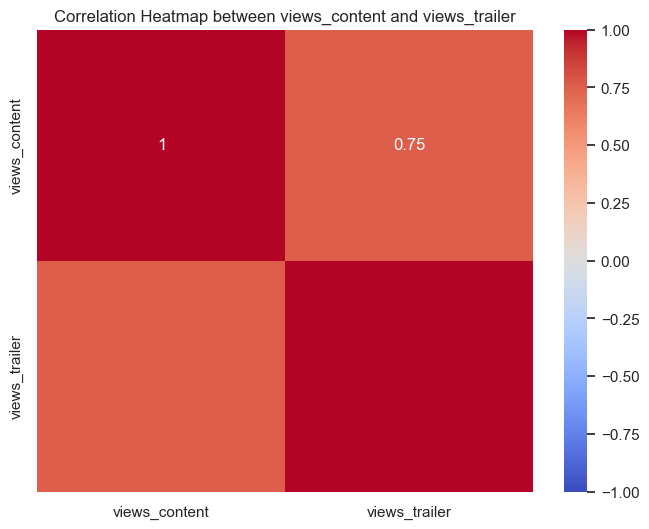

In [205]:
correlation_matrix = df[['views_content', 'views_trailer']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between views_content and views_trailer')
plt.show()

### Bivariate Analysis

**Correlation Check**

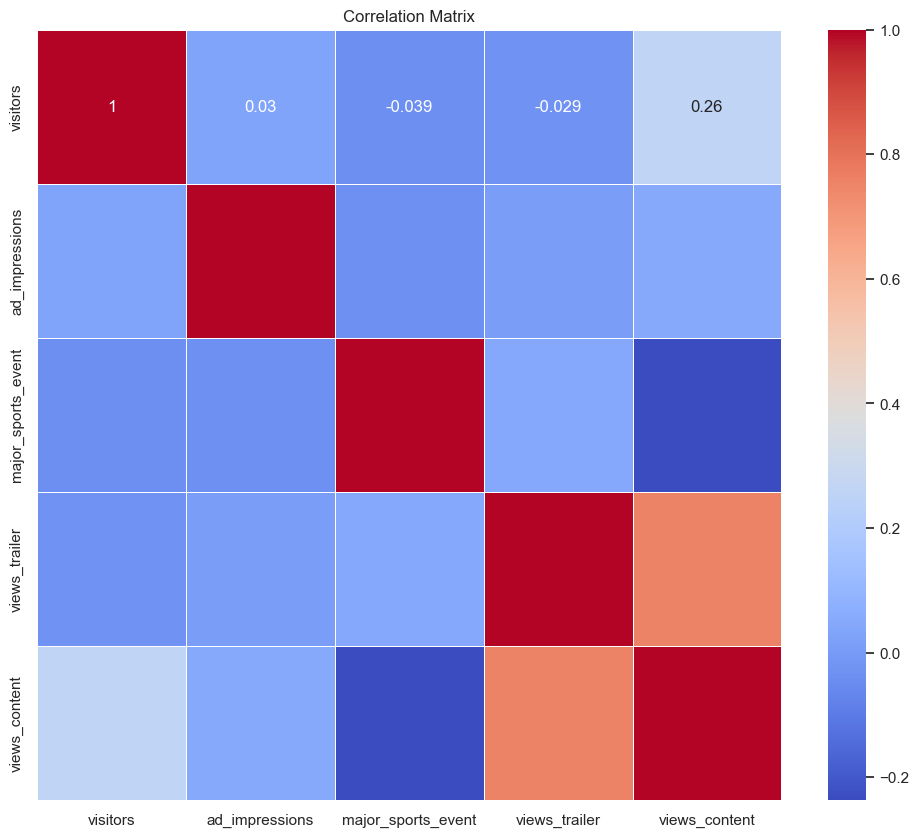

In [36]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Data preparation for Modeling

### Let's do the outliers treatment in the neumerical variables

In [40]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with boundaries
    data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

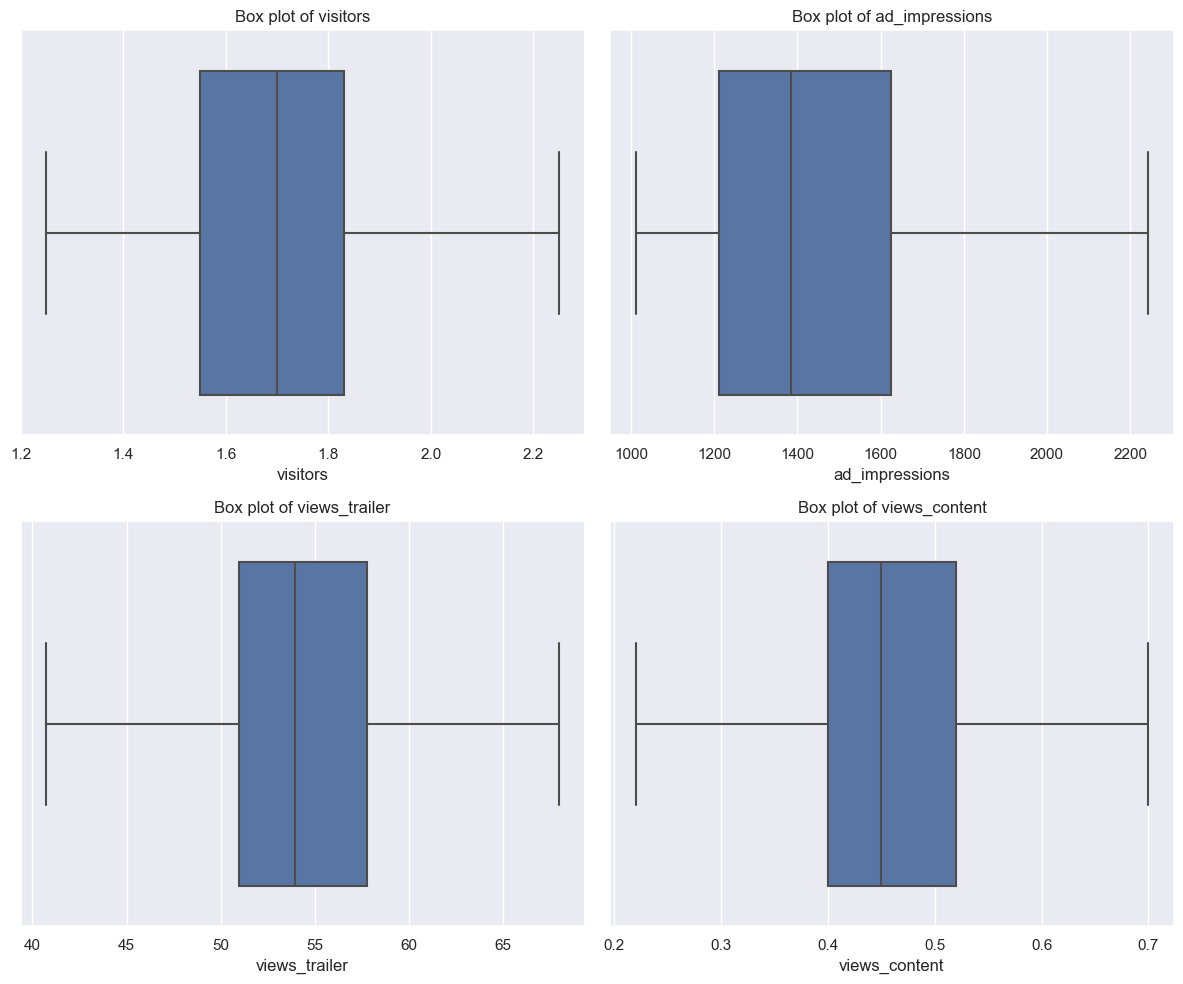

In [41]:
numerical_features = ['visitors', 'ad_impressions', 'views_trailer', 'views_content']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

### Relationship between major_sports_event and other numerical variables

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

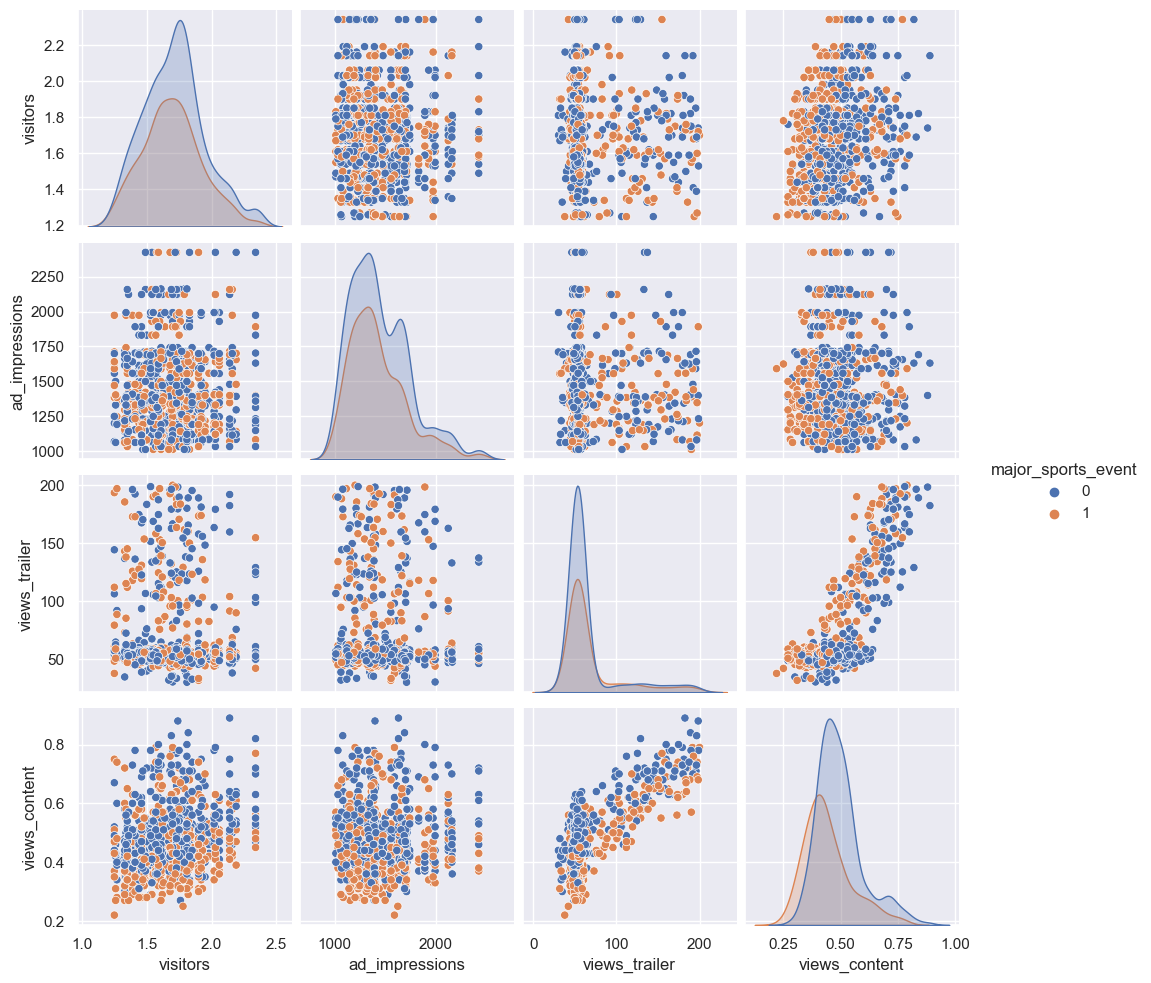

In [43]:
sns.pairplot(data=df, hue="major_sports_event")
plt.show()

### Feature Engineering

## Model Building - Linear Regression

We'll split the data into train and test to be able to evaluate the model that we build on the train data.

We will build a Linear Regression model using the train data and then check it's performance.

We'll build a model to predict visitors based on other variables.

In [48]:
# Define features and target

# X = data_encoded.drop(columns=['visitors'])
# y = data_encoded['visitors']
X = df.drop(['visitors'], axis=1)
y = df['visitors']

In [65]:
# Feature Engineering
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X = X.astype(float)
X.head()

,ad_impressions,major_sports_event,views_trailer,views_content,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1113.81,0.0,56.70,0.51,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1498.41,1.0,52.69,0.32,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1079.19,1.0,48.74,0.39,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1342.77,1.0,49.81,0.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1498.41,0.0,55.83,0.46,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [71]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


In [77]:
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Handle any remaining NaNs
X = X.dropna()
y = y[X.index]  # Align y with the non-NaN X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant to training and test data
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the OLS model
olsmodel1 = sm.OLS(y_train, X_train).fit()

# Print the summary
print(olsmodel1.summary())

# Make predictions
y_pred = olsmodel1.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

                            OLS Regression Results                            
Dep. Variable:               visitors   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     9.859
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           2.67e-27
Time:                        08:40:56   Log-Likelihood:                 142.83
No. Observations:                 800   AIC:                            -243.7
Df Residuals:                     779   BIC:                            -145.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.8311    

**Observations**

* Both the R-squared and Adjusted R squared of our modeare lowgh. This isnar indication that we have been able to createry good model that is able to expla the number of visitors (viewership) for content on the OTT platform6%.

* The model is not an underfitting model.

* To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.

In [101]:
def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)
    
    rmse = np.sqrt(mean_squared_error(target, pred))  # compute RMSE
    mae = mean_absolute_error(target, pred)  # compute MAE
    mape = np.mean(np.abs((target - pred) / target)) * 100  # compute MAPE
    r2 = r2_score(target, pred)  # compute R-squared

    return {
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape,
        "R-squared": r2
    }

# Checking model performance on train set
print("Training Performance:")
olsmodel1_perf_train = model_performance_regression(olsmodel1, X_train, y_train)
print(olsmodel1_perf_train)

# Checking model performance on test set
print("Test Performance:")
olsmodel1_perf_test = model_performance_regression(olsmodel1, X_test, y_test)
print(olsmodel1_perf_test)

Training Performance:
{'RMSE': 0.20240571488041567, 'MAE': 0.16304965917699932, 'MAPE': 9.705270563669234, 'R-squared': 0.2019853342082375}
Test Performance:
{'RMSE': 0.22449882038799446, 'MAE': 0.18502697109950594, 'MAPE': 11.544589569099434, 'R-squared': 0.023996593349633}


The R-squared value for the training set is 0.202, which indicates that approximately 20.2% of the variance in the target variable is explained by the model. This is relatively low, suggesting that the model may not be capturing much of the underlying pattern in the data.

The R-squared value for the test set is even lower at 0.024, indicating that only 2.4% of the variance in the target variable is explained by the model on unseen data. This further suggests that the model is not generalizing well to new data.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

No Multicollinearity

Linearity of variables

Homoscedasticity

Q-Q Plot.edasticity

### 1. Test for multicollinearity

In [144]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [127]:
checking_vif(x_train)

,feature,VIF
0,const,112.368582
1,ad_impressions,1.030484
2,major_sports_event,1.301241
3,views_trailer,1.953696
4,views_content,2.312916
5,genre_Comedy,1.907253
6,genre_Drama,1.917251
7,genre_Horror,1.900879
8,genre_Others,2.559604
9,genre_Romance,1.755691


### Observations
.
As there is no multicollinearity, we can look at the p-values of predictor variables to check their significace.

### 2. Linearity of variables

**Why the test?**

Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

Make a plot of fitted values vs residuals.
If they don't follow any pattern, then we say the model is linear and residuals are independent.
Otherwise, the model is showing signs of non-linearity and residuals are not independent.

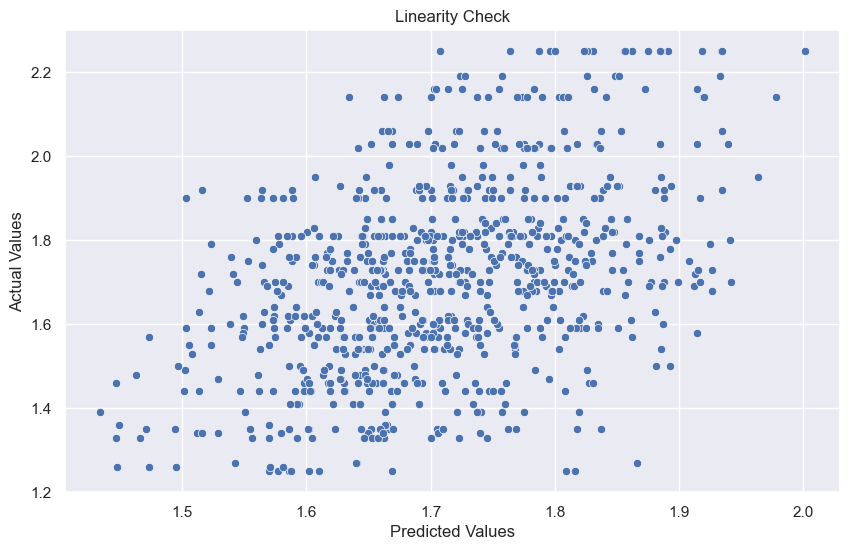

In [172]:
# Linearity
lm = LinearRegression()
lm.fit(X_train, y_train)

# Plotting the linearity check
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lm.predict(X_train), y=y_train)
plt.title('Linearity Check')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

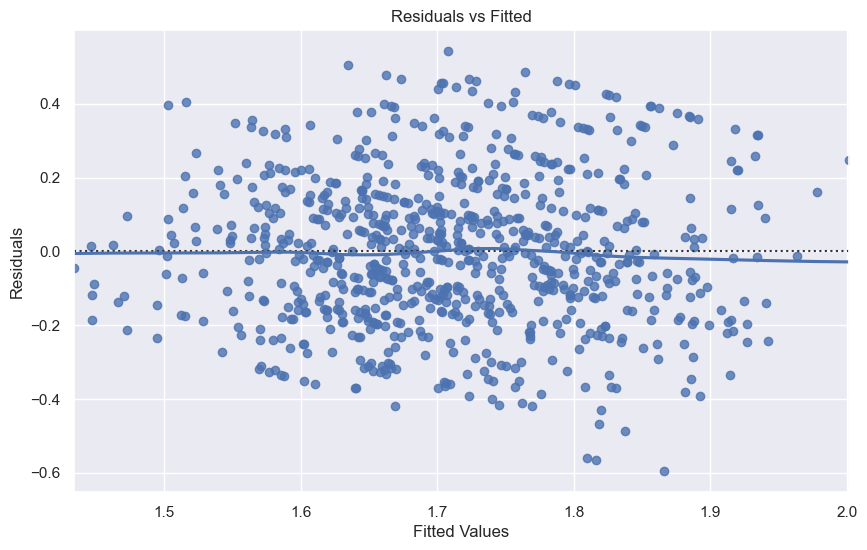

In [183]:
# Homoscedasticity
plt.figure(figsize=(10, 6))
sns.residplot(x=lm.predict(X_train), y=y_train, lowess=True)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

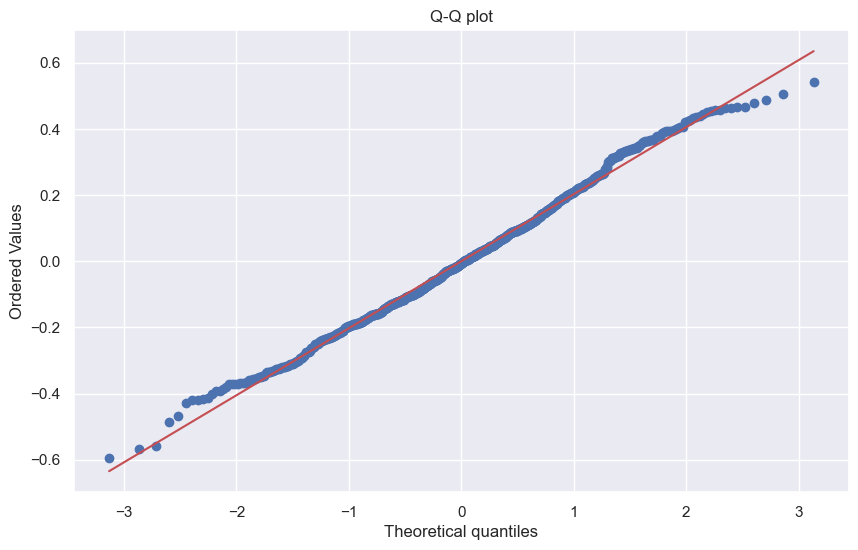

In [185]:
# Q-Q Plot
import pylab
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

- The residuals more or less follow a straight line except for the tails.

## Model Performance Evaluation

In [189]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
y_pred = lm.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 0.050399720355602556
MAE: 0.18502697109950847
R^2: 0.02399659334960269


**Mean Squared Error (MSE):**

MSE is 0.0504. MSE measures the average of the squares of the errors—that is, the average squared difference between the actual and predicted values. A lower MSE indicates better model performance.
This MSE value is consistent with the earlier RMSE value (since RMSE is the square root of MSE). Both metrics indicate the model's prediction errors are relatively low, but not negligible.

**Mean Absolute Error (MAE):**

MAE is 0.1850. MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.
The MAE value indicates that, on average, the model's predictions are off by about 0.185 units from the actual values. This is consistent with the previous MAE value observed.

**R-squared (R²):**

R² is 0.0240. R² is the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating better model performance.
An R² value of 0.0240 indicates that only 2.4% of the variance in the target variable is explained by the model. This suggests that the model is not capturing much of the underlying pattern in the data, which is consistent with the earlier analysis.

**Performance Evaluation**

Model Accuracy: The low R² value indicates poor model accuracy. The model explains only a small fraction of the variance in the dependent variable.
Error Magnitude: The MSE and MAE values, while relatively low, suggest that the model makes errors in its predictions. However, the low R² value shows that these errors do not capture much of the variability in the actual data.

## Actionable Insights

**Significant Predictors:**

Identify the significant predictors from the model summary (those with p-values less than 0.05). These predictors have a strong influence on the number of visitors.
For example, if views_trailer, dayofweek, and genre are significant predictors, focus on these variables for strategic decisions.

**Impact of Genre:**

Certain genres might attract more visitors. If the model indicates that genres like Drama or Comedy have higher coefficients, consider producing more content in these genres.

**Day of the Week:**

The day of release significantly impacts viewership. If the model shows that weekends or specific days have higher coefficients, schedule releases on these days to maximize viewership.

**Trailer Views:**

There is a positive correlation between trailer views and content views. This suggests that effective marketing and promotion of trailers can significantly boost viewership.

**Seasonal Trends:**

If the model shows certain seasons (e.g., winter holidays) have higher viewership, plan major releases or marketing campaigns around these times.
Business Recommendations

**Content Production and Acquisition:**

Focus on producing and acquiring content in genres that attract higher viewership. Utilize the insights from the genre coefficients to guide content strategy.
Regularly update the genre preferences by periodically retraining the model with new data to adapt to changing viewer tastes.

**Marketing and Promotion:**

Invest in promoting trailers, especially for content with high predicted viewership. Utilize social media and targeted advertising to maximize trailer views.
Leverage the positive correlation between trailer views and content views by running teaser campaigns and releasing trailers well in advance of the content release.

**Scheduling Strategy:**

Schedule content releases on days with higher predicted viewership. Use insights from the day-of-week coefficients to optimize the release calendar.
Consider special releases and promotions on high-viewership days to attract more viewers.

**Seasonal Campaigns:**

Plan major content releases during high-viewership seasons. For instance, launch major series or movies during holidays or other peak seasons identified by the model.
Run seasonal marketing campaigns to capitalize on the increased viewership during these periods.

**Data-Driven Decision Making:**

Continuously monitor the model's predictions and performance. Update the model with new data to ensure it remains accurate and reflective of current trends.
Use the model's insights to inform decisions across various departments, including content strategy, marketing, and scheduling.

**User Engagement and Retention:**

Utilize insights from the model to improve user engagement and retention. For example, recommend popular genres or content to users based on their viewing history.
Implement personalized content recommendations using significant predictors to enhance user experience and keep viewers engaged.
By implementing these recommendations, the OTT platform can optimize its content strategy, marketing efforts, and scheduling to maximize viewership and improve overall business 